<a href="https://colab.research.google.com/github/Himika-Mishra/Dissertation/blob/main/Type_1_(Case_2)(Revised).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Type 1 (Case 2)

In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from skimage.util import random_noise
from tqdm import tqdm
import random
from sklearn.preprocessing import OneHotEncoder
import scipy.sparse as sp
from sklearn.metrics import f1_score

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Flatten the images and normalize the pixel values to [0, 1]
x_train = x_train.reshape((60000, 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((10000, 28 * 28)).astype('float32') / 255

In [4]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder on train_labels
encoder.fit(y_train.reshape(-1, 1))

# Encode the train labels
y_train = encoder.transform(y_train.reshape(-1, 1))
# Convert the csr_matrix to a numpy.ndarray
y_train = y_train.toarray()

# Encode the test labels
y_test = encoder.transform(y_test.reshape(-1, 1))
# Convert the csr_matrix to a numpy.ndarray
y_test = y_test.toarray()

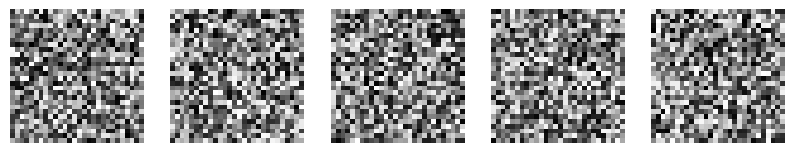

In [5]:
# Generate random noise images
noise_images = np.random.uniform(low=0.0, high=1.0, size=(1000000, 784))

# Plot random 5 noise images
random_indices = np.random.choice(len(noise_images), size=5, replace=False)

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, index in enumerate(random_indices):
    noise_image = noise_images[index].reshape(28, 28)
    axes[i].imshow(noise_image, cmap='gray')
    axes[i].axis('off')

plt.show()

In [6]:
# Create a dataframe to store the noisy images
x_train_distorted = pd.DataFrame(noise_images)

In [7]:
# Define the ratio of distorted images to select
ratios = np.arange(0.1, 1.1, 0.1)

In [8]:
# Create a dataframe of array of zeroes as labels for above distorted images
y_train_distorted = np.zeros((1000000, 10))

In [9]:
# Convert the distorted train data from list and ndarray to DataFrame
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_train_distorted = pd.DataFrame(x_train_distorted)
y_train_distorted = pd.DataFrame(y_train_distorted)

In [20]:
import sklearn

In [21]:
sklearn.__version__

'1.2.2'

In [10]:
mlp1 = MLPClassifier(hidden_layer_sizes=(10,8), activation='relu', solver='adam', max_iter=500)
mlp2 = MLPClassifier(hidden_layer_sizes=(10,8), activation='relu', solver='adam', max_iter=500)

In [16]:
mlp1.random_state

In [13]:
dir(mlp1)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_check_feature_names',
 '_check_n_features',
 '_check_solver',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_parameter_constraints',
 '_predict',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_score',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_data',
 '_validate_input',
 '_validate_params',
 'activation',

In [15]:
# Create a DataFrame with uniform distributed noise
np.random.seed(42)

# Initialize lists to store the ratio and F1 scores
ratios = []
f1_scores = []
classification_reports = []

# Define the range for reducing the training set
start_ratio = 0.1
end_ratio = 1.1
increment = 0.1

# Train and evaluate the model 
# Fit a regular MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train, y_train)
# Accuracy Score
test_acc = mlp.score(x_train, y_train)
# print(mlp.score(x_train, y_train))
print(f"Test accuracy with original data(0-9) with original_ratio= 0.0: {test_acc}")

# predictions
pred = mlp.predict(x_test)
print(confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1)))
print(classification_report(y_test.argmax(axis=1), pred.argmax(axis=1)))

# Calculate F1 score and store the ratio, F1 score, and classification report
f1 = f1_score(y_test.argmax(axis=1), pred.argmax(axis=1), average='weighted')
ratios.append(0.0)
f1_scores.append(f1)
classification_reports.append(classification_report(y_test.argmax(axis=1), pred.argmax(axis=1), output_dict=True))

# Iterate over the ratios
for ratio in np.arange(start_ratio, end_ratio, increment):
    # Calculate the number of distorted images to select based on the ratio
    num_distorted = int(len(x_train) * ratio)

    # Randomly select the specified number of distorted images
    selected_distorted_images = x_train_distorted.sample(n=num_distorted, random_state=42)
    selected_distorted_labels = y_train_distorted.sample(n=num_distorted, random_state=42)

    # Create a noise DataFrame with the same number of rows as reduced training set
    noise_data = pd.DataFrame(np.random.uniform(size=(num_distorted, 784)))
    noise_labels = np.zeros((num_distorted, 10))

    # Concatenate the selected distorted images with the original train dataframe
    merged_x_train = np.concatenate([x_train, noise_data.values])
    merged_y_train = np.concatenate([y_train, noise_labels])

    # Train and evaluate the model 
    # Fit a regular MLP classifier
    mlp = MLPClassifier(hidden_layer_sizes=(10,8), activation='relu', solver='adam', max_iter=500, random_state=10)
    mlp.fit(merged_x_train, merged_y_train)
    # Accuracy Score
    test_acc = mlp.score(merged_x_train, merged_y_train)
    # print(mlp.score(merged_x_train, merged_y_train))
    print(f"Test accuracy with original data(0-9) with adding noise with original_ratio={ratio}: {test_acc}")

    # predictions
    pred = mlp.predict(x_test)
    print(confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1)))
    print(classification_report(y_test.argmax(axis=1), pred.argmax(axis=1)))

    # Calculate F1 score and store the ratio, F1 score, and classification report
    f1 = f1_score(y_test.argmax(axis=1), pred.argmax(axis=1), average='weighted')
    ratios.append(ratio)
    f1_scores.append(f1)
    classification_reports.append(classification_report(y_test.argmax(axis=1), pred.argmax(axis=1), output_dict=True))
    print("--------------------------------------------------")

Test accuracy with original data(0-9) with original_ratio= 0.0: 0.9385833333333333
[[ 957    0    2    1    0    3    2    9    4    2]
 [  13 1098    7    1    0    1    3    3    9    0]
 [  65    5  914   12    4    2    7    6   13    4]
 [  53    1   18  893    0   21    0    5   12    7]
 [  28    1    1    0  901    1   12    4    4   30]
 [  57    0    5   24    2  775    8    0   12    9]
 [  46    1    3    1    3    7  893    0    4    0]
 [  44    4   19    6    3    0    0  932    0   20]
 [  55   10    3    5    4   13    8    2  865    9]
 [  30    4    0   13   29   10    1   14    7  901]]
              precision    recall  f1-score   support

           0       0.71      0.98      0.82       980
           1       0.98      0.97      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.93      0.88      0.91      1010
           4       0.95      0.92      0.93       982
           5       0.93      0.87      0.90       892
       

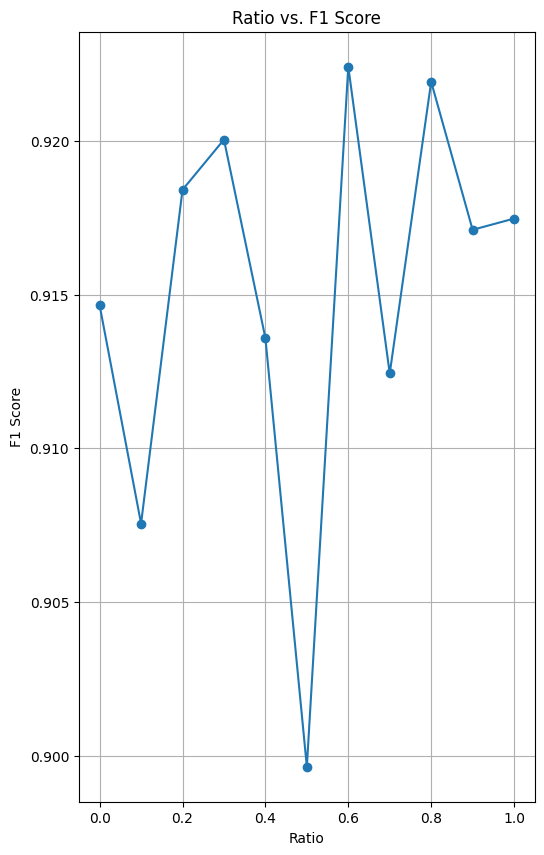

In [16]:
# Plot the ratio vs. F1 score
# plt.figure(figsize=(12, 4))
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.plot(ratios, f1_scores, marker='o')
plt.xlabel('Ratio')
plt.ylabel('F1 Score')
plt.title('Ratio vs. F1 Score')
plt.grid(True)

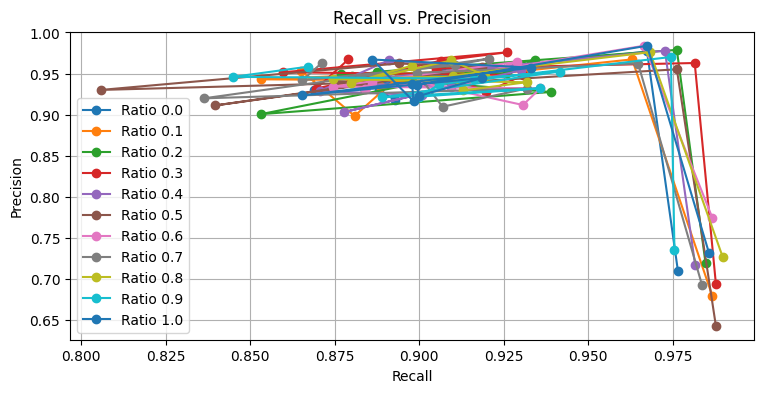

In [17]:
# Plot the recall vs. precision
plt.figure(figsize=(30, 4))
plt.subplot(1, 3, 2)
for i, ratio in enumerate(ratios):
    report = classification_reports[i]
    recall = [report[label]['recall'] for label in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']]
    precision = [report[label]['precision'] for label in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']]
    plt.plot(recall, precision, marker='o', label=f'Ratio {ratio:.1f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall vs. Precision')
plt.legend()
plt.grid(True)

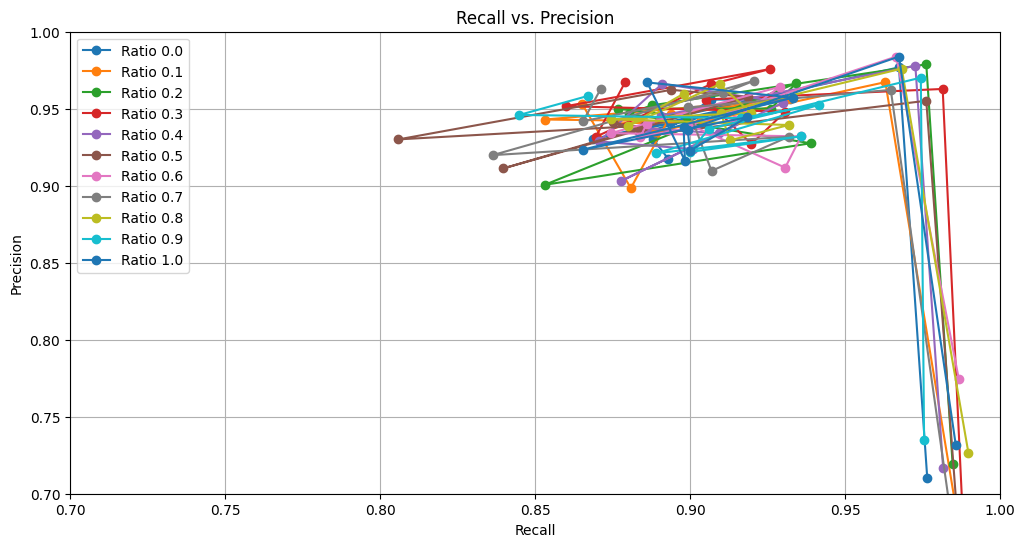

In [18]:
plt.figure(figsize=(12, 6))  # Increase the figure size (adjust as needed)

# Plot the recall vs precision
for i, ratio in enumerate(ratios):
    report = classification_reports[i]
    recall = [report[label]['recall'] for label in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']]
    precision = [report[label]['precision'] for label in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']]
    plt.plot(recall, precision, marker='o', label=f'Ratio {ratio:.1f}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Recall vs. Precision')
plt.legend()
plt.grid(True)

plt.xlim(0.7, 1.0)  # Set x-axis limits
plt.ylim(0.7, 1.0)  # Set y-axis limits

plt.show()

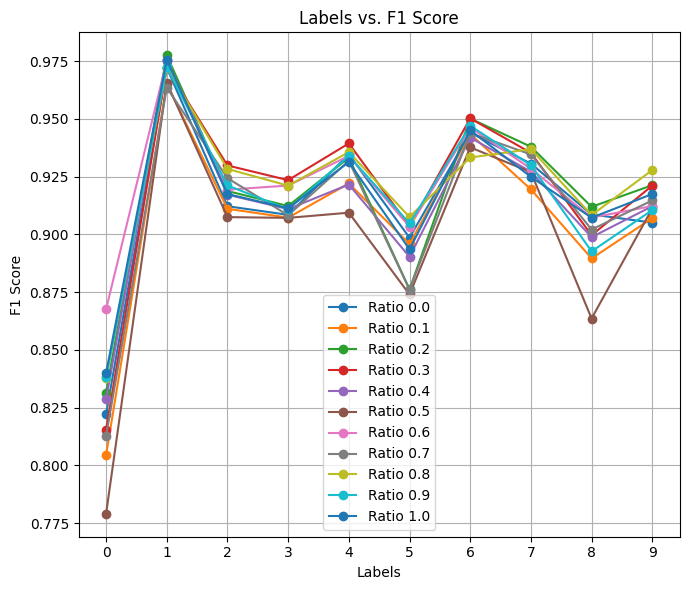

In [19]:
plt.figure(figsize=(20, 6))

# Plot the labels vs. F1 score
plt.subplot(1, 3, 3)
for i, ratio in enumerate(ratios):
    report = classification_reports[i]
    labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    f1_scores = [report[label]['f1-score'] for label in labels]
    plt.plot(labels, f1_scores, marker='o', label=f'Ratio {ratio:.1f}')
plt.xlabel('Labels')
plt.ylabel('F1 Score')
plt.title('Labels vs. F1 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()